In [6]:
bsc = xr.open_dataset("nc_files/NOA-WRF-CHEM/2021120112_NOA-WRF-CHEM.nc")
bsc


<xarray.Dataset>
Dimensions:     (lon: 423, lat: 347, time: 25)
Coordinates:
  * lon         (lon) float32 -28.32 -28.09 -27.87 -27.64 ... 65.69 65.92 66.14
  * lat         (lat) float32 2.335 2.528 2.72 2.912 ... 68.3 68.49 68.68 68.87
  * time        (time) datetime64[ns] 2021-12-01T12:00:00 ... 2021-12-04T12:0...
Data variables:
    SCONC_DUST  (time, lat, lon) float32 ...
    OD550_DUST  (time, lat, lon) float32 ...

In [7]:
# 7 15 
bsc.time.to_series()[15]

Timestamp('2021-12-03 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/NOA-WRF-CHEM/")
len(nc_files)

57

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/NOA-WRF-CHEM/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[15]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 15).sel(lat = stn_lat[i], 
                                                     lon = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-22 09:00:00,2022-01-23 09:00:00,2022-01-24 09:00:00,2022-01-25 09:00:00,2022-01-26 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-02-01 09:00:00
0,ABE,3.33,7.20,0.877402,0.901457,0.000638,0.003470,0.004305,0.002973,0.021750,...,0.889010,0.766970,0.644014,0.574876,0.688330,0.703354,0.684188,1.336744,1.012395,0.563119
1,ABK,8.19,6.25,0.660477,0.605777,0.001338,0.009478,0.012185,0.017182,0.073755,...,0.625666,0.527875,0.508919,0.562403,0.720333,0.667792,0.833788,0.678026,0.627487,0.663576
2,ABU,7.20,9.00,0.869107,0.675733,0.021246,0.036989,0.047908,0.106029,0.119565,...,0.729299,0.684842,0.615884,0.651530,0.790433,0.844072,1.366485,1.025538,0.638976,0.565569
3,ADO,5.20,7.60,0.875128,0.670707,0.002734,0.005937,0.006943,0.003208,0.014316,...,0.750404,0.677940,0.600264,0.529471,0.721904,0.678389,0.933940,1.179774,0.635232,0.581154
4,AKU,5.30,7.20,0.898766,0.650002,0.002626,0.006369,0.007409,0.002786,0.014148,...,0.761115,0.587468,0.568897,0.541854,0.727898,0.686454,0.906212,1.140615,0.725251,0.604793
5,ASA,6.23,6.82,0.993896,0.590850,0.002822,0.008244,0.010405,0.009123,0.023470,...,0.760873,0.639022,0.551824,0.520140,0.774766,0.624900,0.966241,0.963773,0.698285,0.655703
6,AWK,7.07,6.20,0.764732,0.554836,0.001752,0.008187,0.009587,0.026119,0.032828,...,0.718424,0.536049,0.493099,0.558989,0.706712,0.711655,0.909451,0.838640,0.713968,0.692598
7,BAU,9.82,10.28,1.095384,0.819331,0.082638,0.475502,0.218753,0.252201,0.781097,...,0.649744,0.549659,0.444398,0.730316,0.787269,1.093385,1.285248,0.877907,0.597710,0.916277
8,BEN,5.60,6.33,1.015518,0.554425,0.002427,0.008148,0.007086,0.003488,0.022567,...,0.796478,0.622856,0.590914,0.484342,0.796675,0.631790,0.959073,0.966339,0.767834,0.680536
9,BID,6.00,9.80,0.991201,1.001748,0.020728,0.211779,0.031645,0.285826,0.428107,...,0.935586,0.870451,0.676082,0.591932,0.764649,1.449677,2.228750,1.811598,0.834194,0.834350


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.877402,0.660477,0.869107,0.875128,0.898766,0.993896,0.764732,1.095384,1.015518,...,1.043838,0.829082,1.356695,0.63859,0.605002,0.66264,1.223845,0.351155,0.83838,1.262728
1,2021-12-04 09:00:00,0.901457,0.605777,0.675733,0.670707,0.650002,0.59085,0.554836,0.819331,0.554425,...,0.778783,0.753128,0.718104,0.538386,0.549218,0.525303,1.242915,0.435601,0.45452,0.791896
2,2021-12-05 09:00:00,0.000638,0.001338,0.021246,0.002734,0.002626,0.002822,0.001752,0.082638,0.002427,...,0.094615,0.000661,0.108926,0.001032,0.000487,0.001111,0.004916,0.000036,0.098067,0.079596
3,2021-12-06 09:00:00,0.00347,0.009478,0.036989,0.005937,0.006369,0.008244,0.008187,0.475502,0.008148,...,0.484839,0.004303,0.152268,0.007243,0.005534,0.00641,0.017041,0.00408,0.223438,0.29581
4,2021-12-07 09:00:00,0.004305,0.012185,0.047908,0.006943,0.007409,0.010405,0.009587,0.218753,0.007086,...,0.271337,0.005284,0.10083,0.009197,0.009013,0.003425,0.016636,0.001065,0.205901,0.135561
5,2021-12-08 09:00:00,0.002973,0.017182,0.106029,0.003208,0.002786,0.009123,0.026119,0.252201,0.003488,...,0.34587,0.002682,0.37828,0.010651,0.004008,0.003964,0.22243,0.001874,0.115152,0.303186
6,2021-12-09 09:00:00,0.02175,0.073755,0.119565,0.014316,0.014148,0.02347,0.032828,0.781097,0.022567,...,0.809454,0.034225,0.453688,0.024019,0.016964,0.027033,0.247425,0.016478,0.835661,0.787401
7,2021-12-10 09:00:00,0.002817,0.093592,0.235061,0.011264,0.012893,0.054495,0.079327,0.451985,0.036273,...,0.44602,0.015421,0.365738,0.04306,0.019867,0.037276,0.181262,0.015884,0.33712,0.450864
8,2021-12-12 09:00:00,0.004796,0.010686,0.03603,0.017144,0.014131,0.01327,0.011836,0.177692,0.010977,...,0.224666,0.006519,0.115515,0.008878,0.007993,0.008749,0.093485,0.005646,0.105443,0.197731
9,2021-12-14 09:00:00,0.002877,0.010991,0.022133,0.003734,0.003509,0.002979,0.003821,0.097265,0.002746,...,0.264466,0.003401,0.04335,0.003024,0.001822,0.003419,0.078377,0.000931,0.093036,0.064856


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.877402,0.660477,0.869107,0.875128,0.898766,0.993896,0.764732,1.095384,1.015518,0.991201,...,1.043838,0.829082,1.356695,0.63859,0.605002,0.66264,1.223845,0.351155,0.83838,1.262728
2021-12-04,0.901457,0.605777,0.675733,0.670707,0.650002,0.59085,0.554836,0.819331,0.554425,1.001748,...,0.778783,0.753128,0.718104,0.538386,0.549218,0.525303,1.242915,0.435601,0.45452,0.791896
2021-12-05,0.000638,0.001338,0.021246,0.002734,0.002626,0.002822,0.001752,0.082638,0.002427,0.020728,...,0.094615,0.000661,0.108926,0.001032,0.000487,0.001111,0.004916,0.000036,0.098067,0.079596
2021-12-06,0.00347,0.009478,0.036989,0.005937,0.006369,0.008244,0.008187,0.475502,0.008148,0.211779,...,0.484839,0.004303,0.152268,0.007243,0.005534,0.00641,0.017041,0.00408,0.223438,0.29581
2021-12-07,0.004305,0.012185,0.047908,0.006943,0.007409,0.010405,0.009587,0.218753,0.007086,0.031645,...,0.271337,0.005284,0.10083,0.009197,0.009013,0.003425,0.016636,0.001065,0.205901,0.135561
2021-12-08,0.002973,0.017182,0.106029,0.003208,0.002786,0.009123,0.026119,0.252201,0.003488,0.285826,...,0.34587,0.002682,0.37828,0.010651,0.004008,0.003964,0.22243,0.001874,0.115152,0.303186
2021-12-09,0.02175,0.073755,0.119565,0.014316,0.014148,0.02347,0.032828,0.781097,0.022567,0.428107,...,0.809454,0.034225,0.453688,0.024019,0.016964,0.027033,0.247425,0.016478,0.835661,0.787401
2021-12-10,0.002817,0.093592,0.235061,0.011264,0.012893,0.054495,0.079327,0.451985,0.036273,0.284159,...,0.44602,0.015421,0.365738,0.04306,0.019867,0.037276,0.181262,0.015884,0.33712,0.450864
2021-12-12,0.004796,0.010686,0.03603,0.017144,0.014131,0.01327,0.011836,0.177692,0.010977,0.126736,...,0.224666,0.006519,0.115515,0.008878,0.007993,0.008749,0.093485,0.005646,0.105443,0.197731


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,0.83838
2021-12-04,2.0,0.45452
2021-12-05,5.0,0.098067
...,...,...
2022-01-28,0.6,1.075012
2022-01-29,5.0,0.741716
2022-01-30,5.0,0.673064
2022-01-31,8.0,NaN


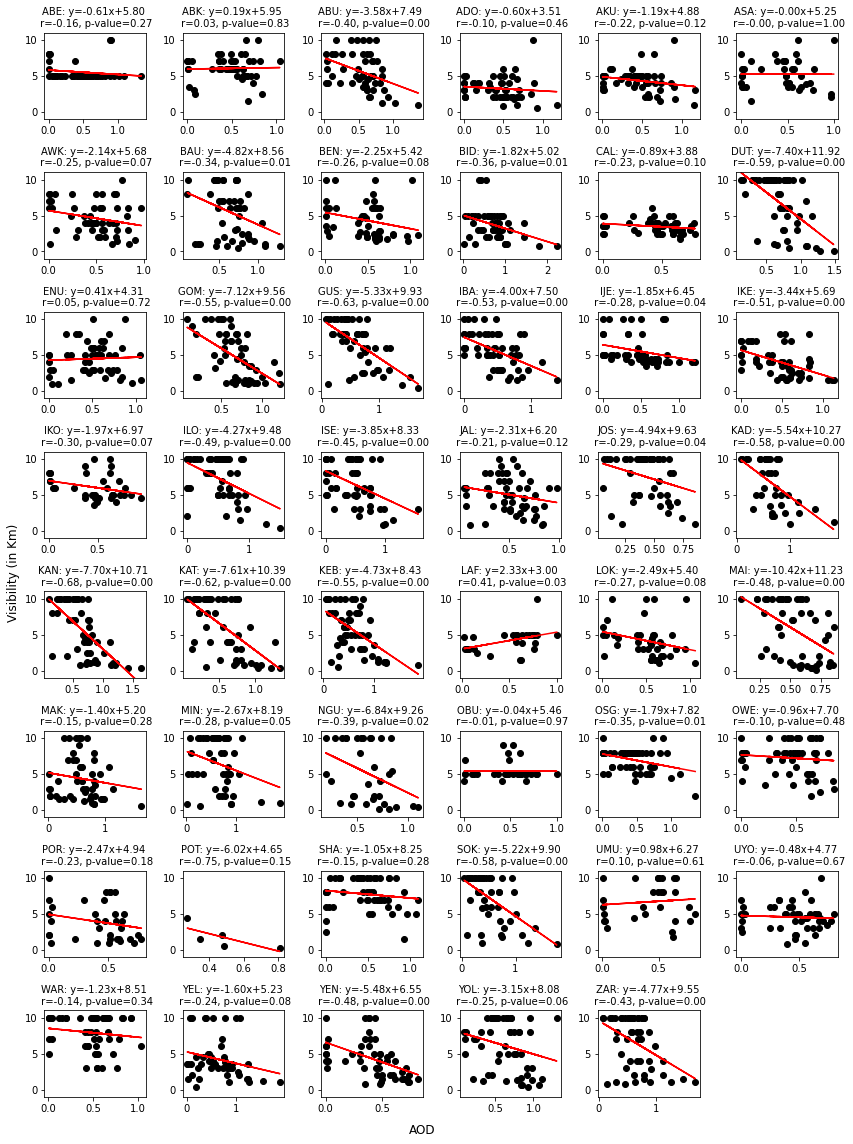

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.16,0.27,1
1,6.25,8.19,ABK,0.03,0.83,1
2,9.00,7.20,ABU,-0.40,0.00,2
3,7.60,5.20,ADO,-0.10,0.46,1
4,7.20,5.30,AKU,-0.22,0.12,1
5,6.82,6.23,ASA,-0.00,1.00,1
6,6.20,7.07,AWK,-0.25,0.07,1
7,10.28,9.82,BAU,-0.34,0.01,2
8,6.33,5.60,BEN,-0.26,0.08,1
9,9.80,6.00,BID,-0.36,0.01,2


In [15]:
# cor_df.to_csv("cor_files/day1/NOA-WRF-CHEM_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/NOA-WRF-CHEM_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/NOA-WRF-CHEM_3d.csv", index=False)

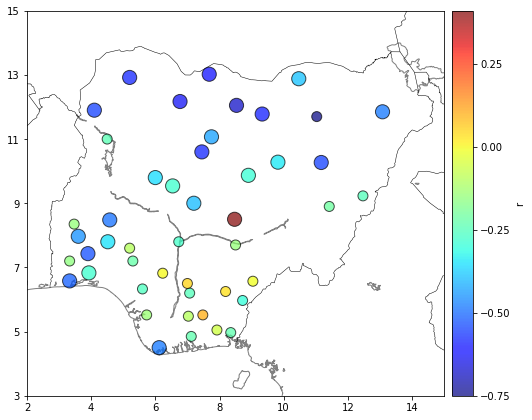

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()